# Adding Inset Axes to Matplotlib Figures
## A how-to on adding inset axes to a Matplotlib figure to improve your data visualisation

Original Article: https://medium.com/towards-data-science/adding-inset-axes-to-matplotlib-figures-811a9482c43c
Author: Andy McDonald (https://www.andymcdonald.scot/)

When creating figures in matplotlib, there may be occasions where you want to add a smaller figure or axes inside of your main figure. This could be for a number of reasons, but most commonly, it is used to highlight an area of interest and enlarge it or to include additional information that is related to the main figure.

Matplotlib makes this process very simple by allowing us to add inset axes within the main figure. This can then be further tweaked to get the information we want displayed how we want.

In this short tutorial, we will see how to create a simple well location map, like the one below, using grid coordinates. We will then add inset axes to highlight and enlarge a smaller area of the main map.

## Importing Libraries and Loading Data
The first step in our tutorial is to import the libraries we are going to be using.

The first two import statements should be familiar: importing pandas and matplotib. The third import from mpl.toolkits.axes_grid1.inset_locator allows us to plot our inset figure within the bounds of our main figure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

Once the libraries have been imported, we can import the data. The data used here is from the Force 2020 Xeek Machine Learning competition and contains around 100 wells worth of well logging measurements.

As this file is delimited by a semi-colon ( ; ) we need to include an extra parameter to tell the pd.read_csv() function that is what the separator is between the values.



In [2]:
df = pd.read_csv('../data/Xeek Force 2020/train.csv', sep=';')
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


Creating a Well Location Map Using X and Y Co-ordinates in Matplotlib
Now that the data has been loaded, we can create our first figure.

This figure will contain the X and Y location information from the CSV file and will show us the positions of the wells that are included within the dataset.

These locations are grid coordinates rather than latitude and longitude.

First, we create the figure and set the size to 12 x 12.

Then, we create the scatter plot and pass it in the X_LOC and Y_LOC columns. To make the data points sit in front of the grid, we need to set the zorder to 1

Next, we set the x and y axes by defining the labels and limits.

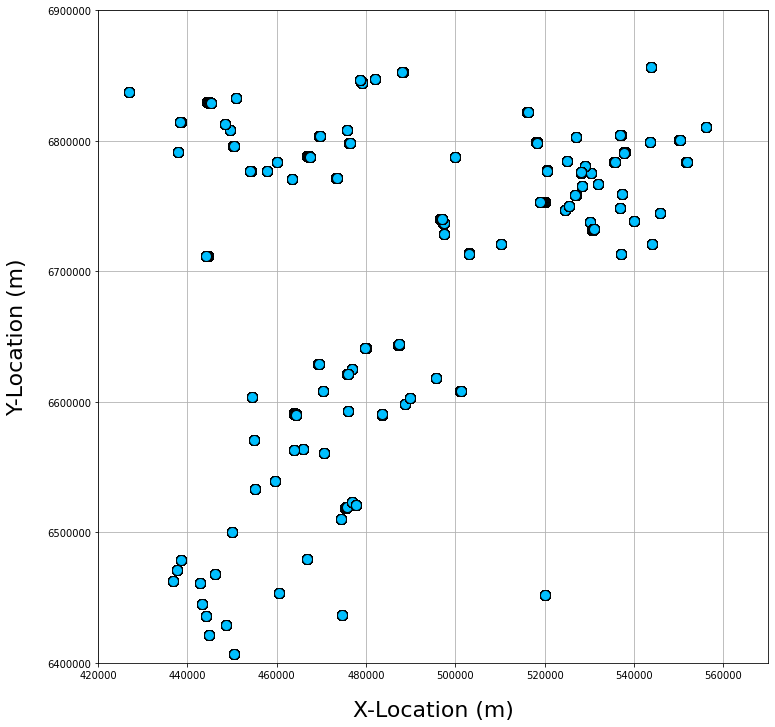

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))

# Main Scatter Plot
ax.scatter(df['X_LOC'], df['Y_LOC'], c='deepskyblue', 
                     edgecolors='black', zorder=2, s=100, marker='o')

# In cases where we have very large numbers, matplotlib will switch to scientific notation. If we want to avoid this, we can use the following line:
ax.ticklabel_format(style='plain')

ax.set_xlabel('X-Location (m)', fontsize=22, labelpad=20)
ax.set_ylabel('Y-Location (m)', fontsize=22, labelpad=20)

ax.set_xlim(420000, 570000)
ax.set_ylim(6400000, 6900000)


# Finally, we will make the grid appear and then set the zorder to 0, which will then place the grid at the lowest layer.
ax.grid(zorder=0)

plt.show()

## Adding an Inset Figure to Matplotlib
Once we have the main figure set up, we need to set up the inset figure. This code essentially follows from the previous section.

First, we declare a new variable called ax_inset and assign it to the inset_axes method we imported earlier. This will allow us to create a new inset axes in the lower right corner of the existing axes ax.

The inset axes will be set to 30% of the width and height of ax. The loc parameter controls the position of the inset axes and places it in the lower right edge of the parent axes.

Finally, the calls to bbox_transform and bbox_to_anchor will specify the coordinate reference system for the bounding box (bbox) to anchor to.

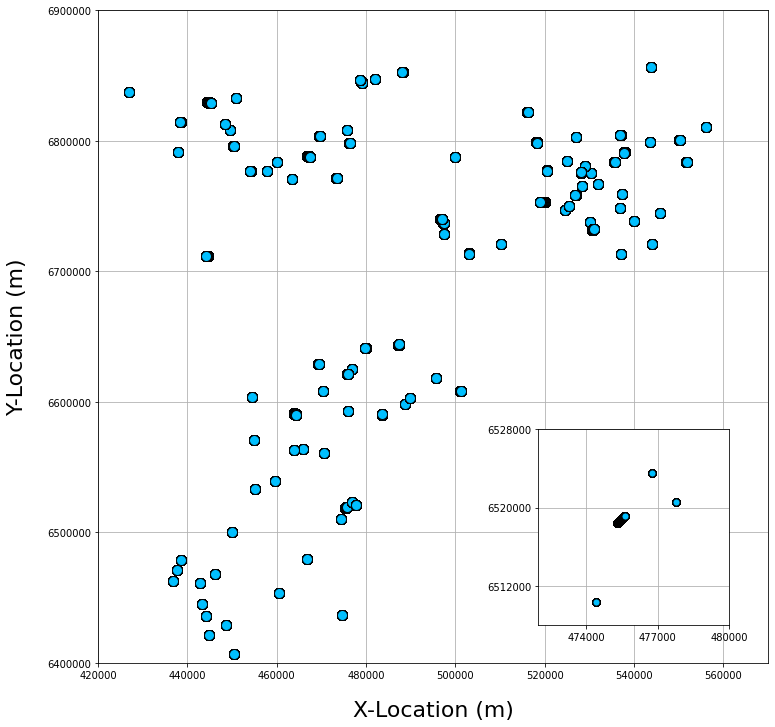

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))

# Main Scatter Plot
ax.scatter(df['X_LOC'], df['Y_LOC'], c='deepskyblue', 
                     edgecolors='black', zorder=2, s=100, marker='o')

ax.ticklabel_format(style='plain')

ax.set_xlabel('X-Location (m)', fontsize=22, labelpad=20)
ax.set_ylabel('Y-Location (m)', fontsize=22, labelpad=20)

ax.set_xlim(420000, 570000)
ax.set_ylim(6400000, 6900000)

ax.grid(zorder=0)

ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower right',
                      bbox_to_anchor=(0, 0.05, 0.95, 1),
                      bbox_transform=ax.transAxes)

# Once the inset axes have been defined, we can set parameters like a normal axes object in matplotlib. 
# Here we set it to display the same data as the main figure, but as we are zooming in to a smaller section of it, we need to adjust the xlim and ylim parameters.

ax_inset.scatter(df['X_LOC'], df['Y_LOC'], c='deepskyblue', 
                     edgecolors='black', zorder=2, s=50, marker='o')

ax_inset.set_xlim(472000, 480000)
ax_inset.set_ylim(6508000, 6528000)

# To avoid any issues with scientific notation on the axes, we can set the tick label style to plain.
ax_inset.ticklabel_format(style='plain')
ax_inset.xaxis.set_major_locator(plt.MaxNLocator(nbins=3))
ax_inset.yaxis.set_major_locator(plt.MaxNLocator(nbins=3))

ax_inset.grid()

# mark_inset(ax, ax_inset, loc1=2, loc2=3, fc='red', ec='0.5')

plt.show()

## Marking the Inset Axes and Tying it Back to the Main Axes
Finally, to highlight how our inset figure relates to the main figure, we can call upon mark_inset and pass in the two axes objects, first the parent axes object( ax ) followed by the inset axes object (ax_inset ).

We then need to specify the locations of the connecting lines that mark the inset. In this case, we are using locations 2 (upper left corner) and 3 (lower left corner). The colour ( ec) of the connecting lines can also be set here if needed.

If we want, we can add some colour to the main axes object to fill in the area that the inset covers. In this example, I have set it to fill the area in red.



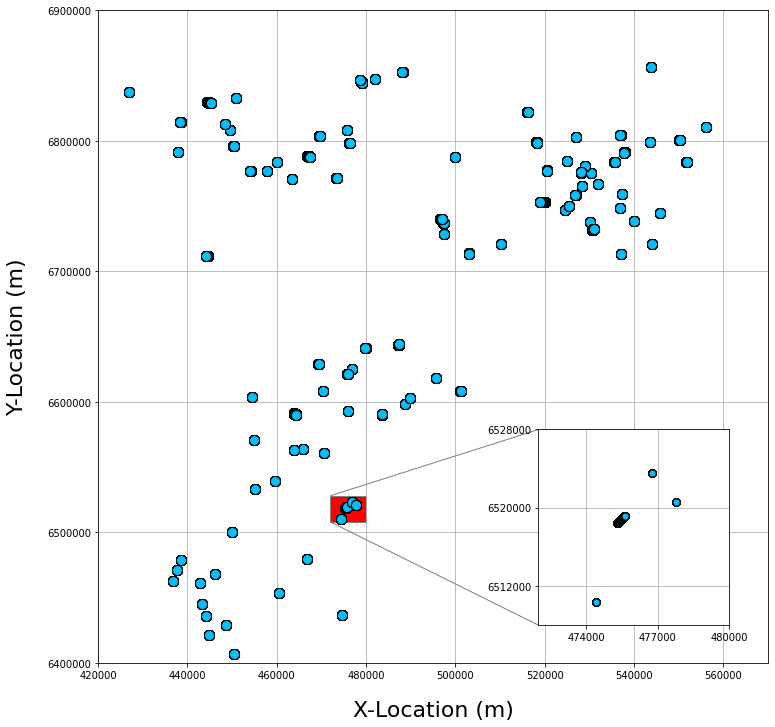

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))

# Main Scatter Plot
ax.scatter(df['X_LOC'], df['Y_LOC'], c='deepskyblue', 
                     edgecolors='black', zorder=2, s=100, marker='o')

ax.ticklabel_format(style='plain')

ax.set_xlabel('X-Location (m)', fontsize=22, labelpad=20)
ax.set_ylabel('Y-Location (m)', fontsize=22, labelpad=20)

ax.set_xlim(420000, 570000)
ax.set_ylim(6400000, 6900000)

ax.grid(zorder=0)

ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower right',
                      bbox_to_anchor=(0, 0.05, 0.95, 1),
                      bbox_transform=ax.transAxes)

ax_inset.scatter(df['X_LOC'], df['Y_LOC'], c='deepskyblue', 
                     edgecolors='black', zorder=2, s=50, marker='o')

ax_inset.set_xlim(472000, 480000)
ax_inset.set_ylim(6508000, 6528000)

ax_inset.ticklabel_format(style='plain')
ax_inset.xaxis.set_major_locator(plt.MaxNLocator(nbins=3))
ax_inset.yaxis.set_major_locator(plt.MaxNLocator(nbins=3))

ax_inset.grid()

mark_inset(ax, ax_inset, loc1=2, loc2=3, fc='red', ec='0.5')

plt.show()

## Summary
Within this short tutorial, we have seen how we can easily add inset axes to our main matplotlib figure to highlight a smaller area of a well location map. This not only highlights important areas to the reader, but it can also make the plot more aesthetically pleasing to look at.

## Dataset Used Within this Tutorial
Training dataset used as part of a Machine Learning competition run by Xeek and FORCE 2020 (Bormann et al., 2020). This dataset is licensed under Creative Commons Attribution 4.0 International.

The full dataset can be accessed at the following link: https://doi.org/10.5281/zenodo.4351155.